# 시계열 분석

## 4장. SMA (Simple Moving Average) 모델
- Rolling을 사용하여 평균을 구해서 데이터 예측하는 모델
- 단점 : window값이 커질수록 앞에 missing data가 많아져서 트렌드를 늦게 반영한다. 따라서, 극단값을 쫓아가지 못한다.
    

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

---
---

## 01. 데이터 불러오기

In [4]:
airline = pd.read_csv('./data/airline_passengers.csv', index_col = 'Month', parse_dates=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


---

## 02. SMA

In [5]:
# 6개월 롤링, 12개월 롤링 컬럼 만들기
airline['6M SMA'] = \
airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12M SMA'] = \
airline['Thousands of Passengers'].rolling(window=12).mean() 

In [6]:
# 6개월롤링은 앞에 데이터 6개, 12개월롤링은 12개가 missing된것 확인 가능
airline.head(12)

,Thousands of Passengers,6M SMA,12M SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


<AxesSubplot:xlabel='Month'>

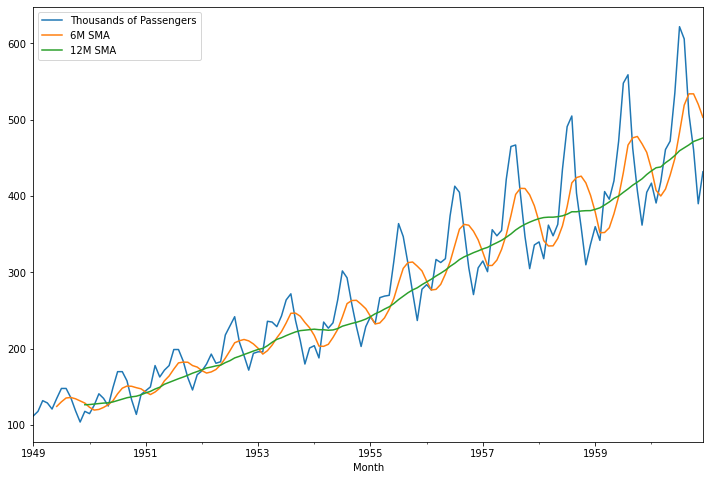

In [7]:
# 그래프로 확인
airline.plot(figsize=(12,8))
## 12M SMA는 트렌드만 따라가는 모습 보인다. (계절성 거의 따라가지 못함)

In [13]:
# 모델평가(RMSE) - 6M의 성능이 더 좋은 것 확인 가능
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(airline['Thousands of Passengers']['1949-06':],airline['6M SMA'].dropna())))
print(np.sqrt(mean_squared_error(airline['Thousands of Passengers']['1949-12':],airline['12M SMA'].dropna())))

45.73551148059554
48.00924259647008
